In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
ents = [0.0, 0.01, 0.05, 0.1, 0.4, 0.8]
clips = [0.005, 0.02, 0.08, 0.2, 0.5, 0.8, 1e6]

In [3]:
def heatmap(returns, ents, clips):
    print("Heatmap")
    plt.figure(figsize=(8, 6))
    heats = np.mean(returns, axis=0)[:, :, -1]
    assert heats.shape == (len(ents), len(clips))
    sns.heatmap(heats[::-1, ::-1], annot=True, fmt='.2f', linewidths=2, yticklabels=ents[::-1], xticklabels=clips[::-1], cmap="Blues_r")
    plt.xlabel("Eps.")
    plt.ylabel("Ent. bonus")
    plt.show()
    

def plot_returns(env_name, ents, clips, base, std_scale=0.1, y_max=None, y_min=None, tick=10):
    with open(f"./shared/fixed_rep/{env_name}_{base}base_continue.npy", 'rb') as f:
        returns = np.load(f)
    with open(f"./shared/fixed_rep/{env_name}_{base}base_continue_exps.npy", 'rb') as f:
        exps = np.load(f)
    assert len(returns.shape) == 4  # (n_seeds, n_ent, n_clip, n_exp)
    assert returns.shape[1:3] == (len(ents), len(clips))
    print("Shape:", returns.shape)
    print("Max:", np.max(np.mean(returns, axis=0)))

    plt.figure(figsize=(24, 15))

    for j in range(returns.shape[1]):

        data_j = pd.concat([pd.DataFrame(returns[:, j, k, :], index=[f"eps={clips[k] if clips[k]<1000 else None}"]*returns.shape[0], columns=exps)
                            for k in range(returns.shape[2])], axis=0)
        assert returns.shape[1] <= 6
        plt.subplot(2, 3, j+1)
        ax = sns.lineplot(data_j.T, errorbar=("sd", std_scale))
        plt.xlabel("Experience")
        plt.ylabel("Return")
        plt.ylim(bottom=y_min, top=y_max)
        ax.yaxis.set_major_locator(plticker.MultipleLocator(base=tick))
        plt.title(f"Ent. bonus={ents[j]}")
    plt.show()
    
    heatmap(returns, ents, clips)
    
    return returns

## 1. Acrobot

In [4]:
# returns = plot_returns("Acrobot-v1", ents, clips, base="noreg", y_max=-75)

Shape: (8, 6, 7, 50)
Max: -73.3125


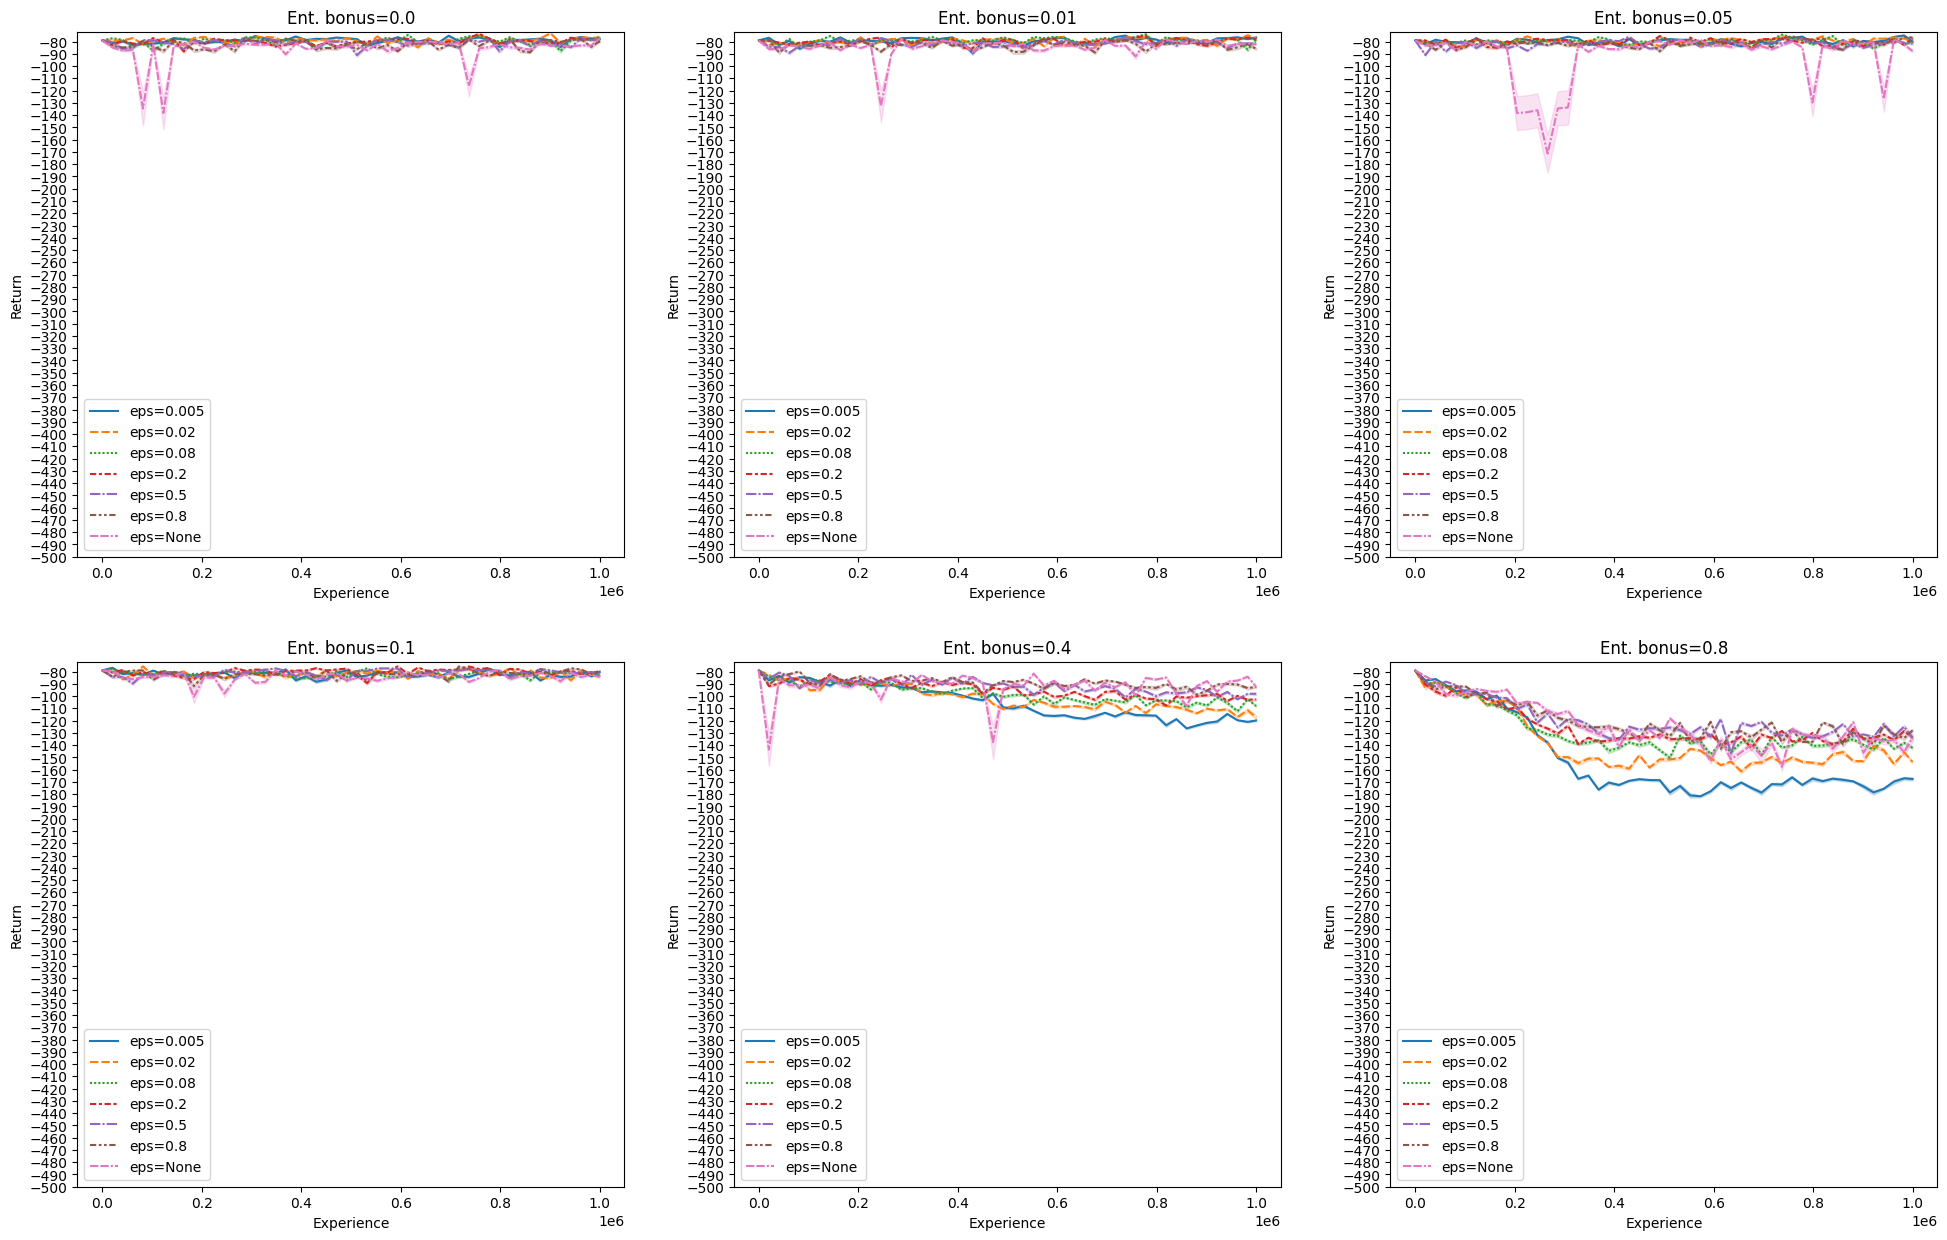

Heatmap


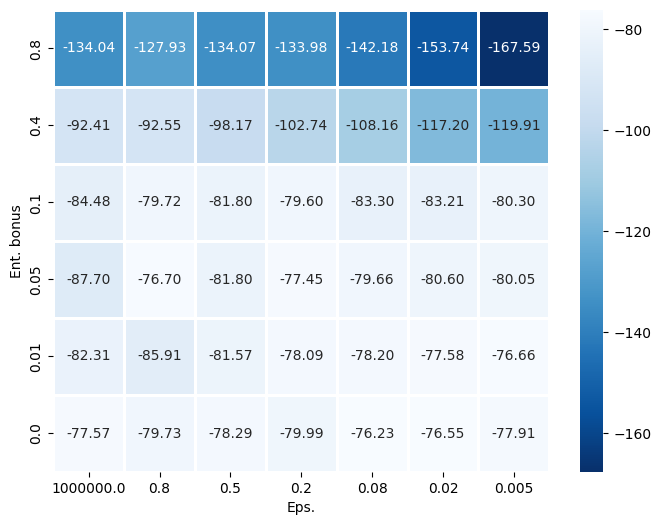

In [18]:
returns = plot_returns("Acrobot-v1", ents, clips, base="optimal", y_min=-500, y_max=-72)

## 2. Asterix

In [6]:
# returns = plot_returns("Asterix-MinAtar", ents, clips, base="noreg", y_max=35, tick=5)

Shape: (8, 6, 7, 63)
Max: 44.921875


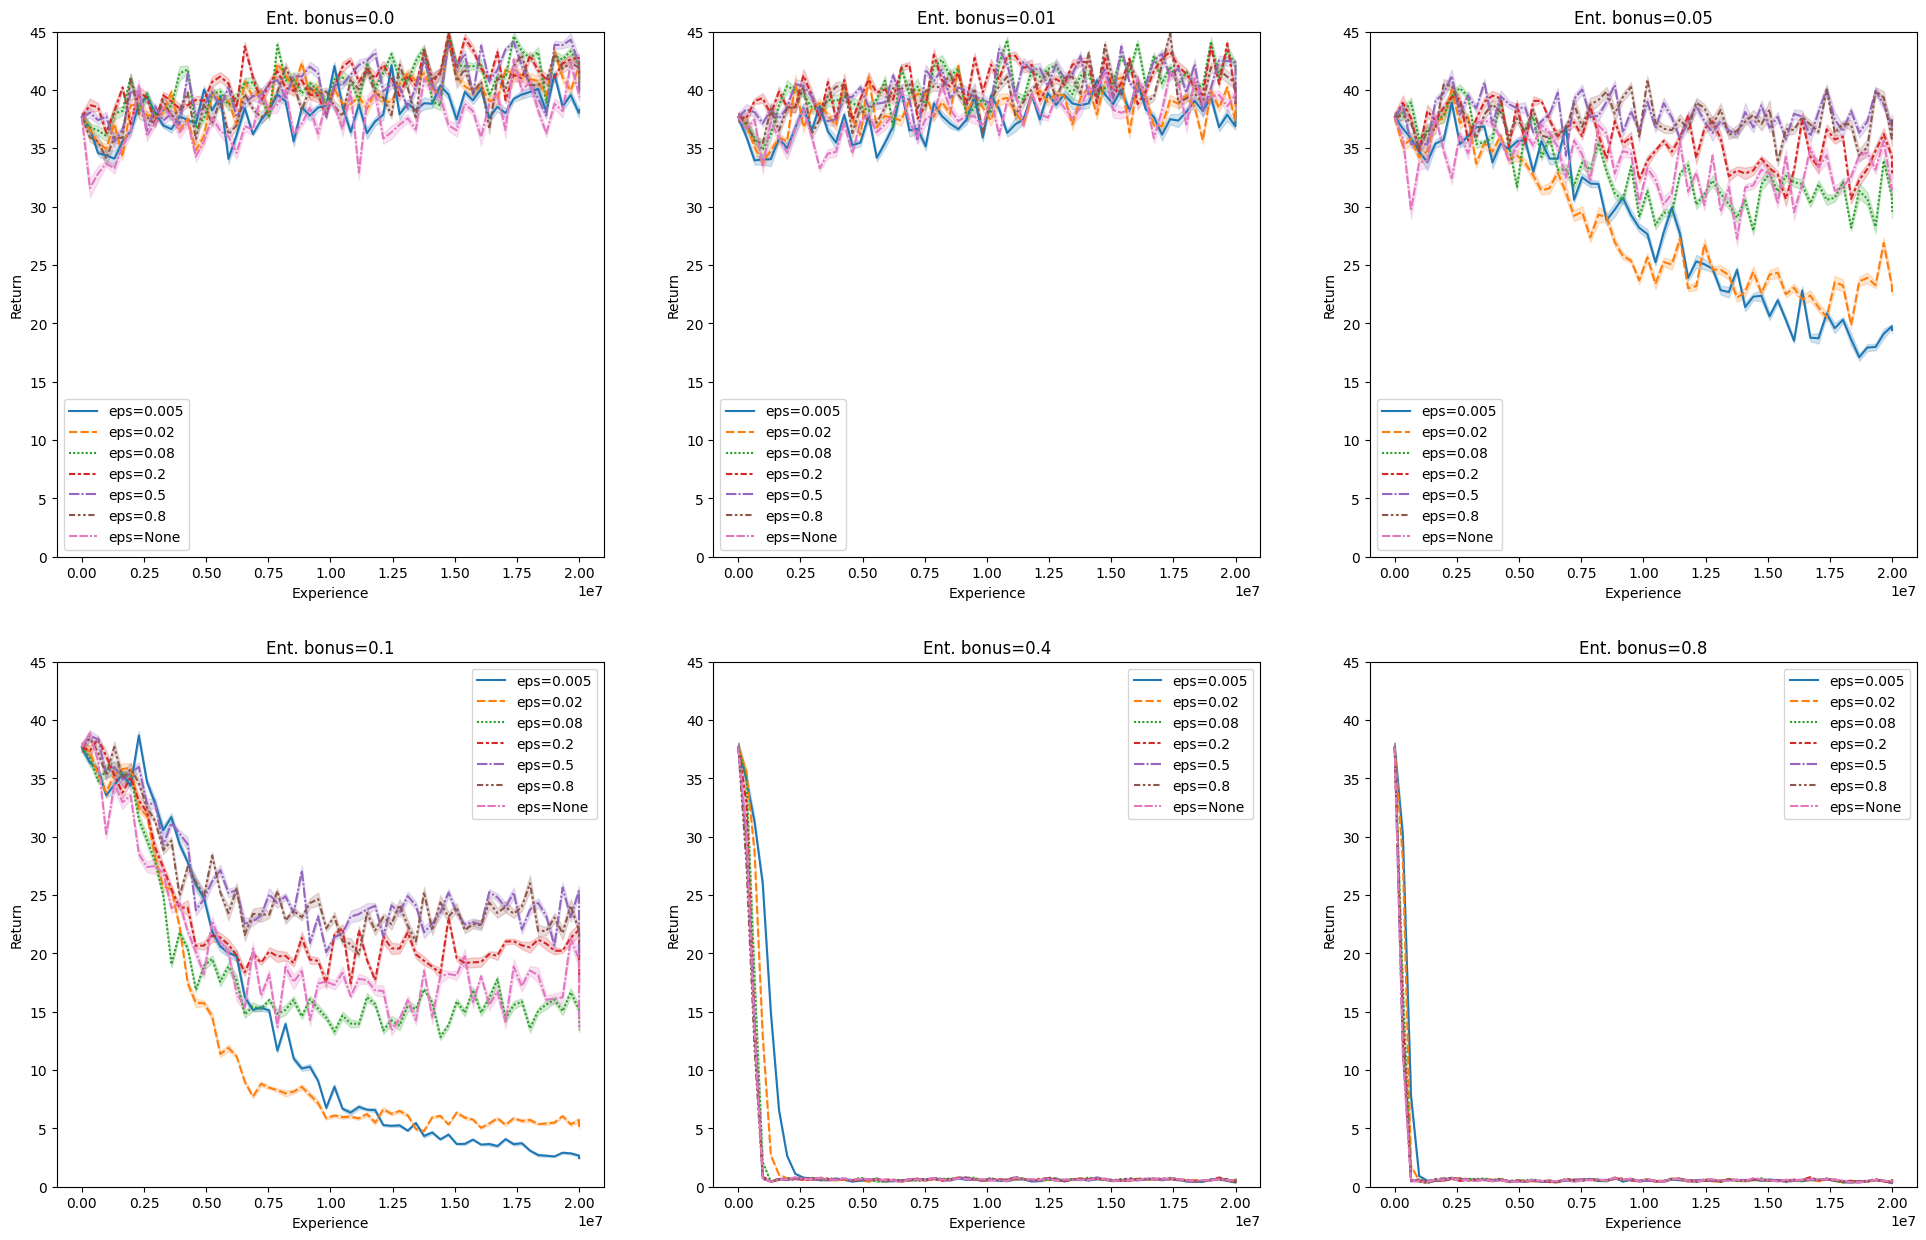

Heatmap


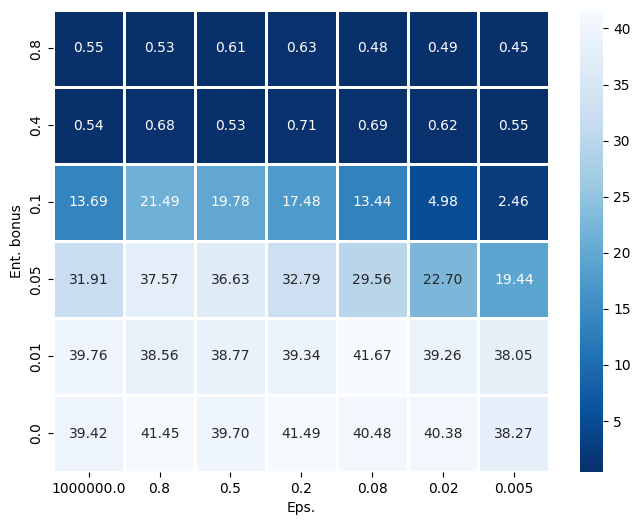

In [19]:
returns = plot_returns("Asterix-MinAtar", ents, clips, base="optimal", y_min=0, y_max=45, tick=5)

## 3. Breakout

In [8]:
# returns = plot_returns("Breakout-MinAtar", ents, clips, base="noreg", y_max=78, tick=5)

Shape: (8, 6, 7, 63)
Max: 94.375


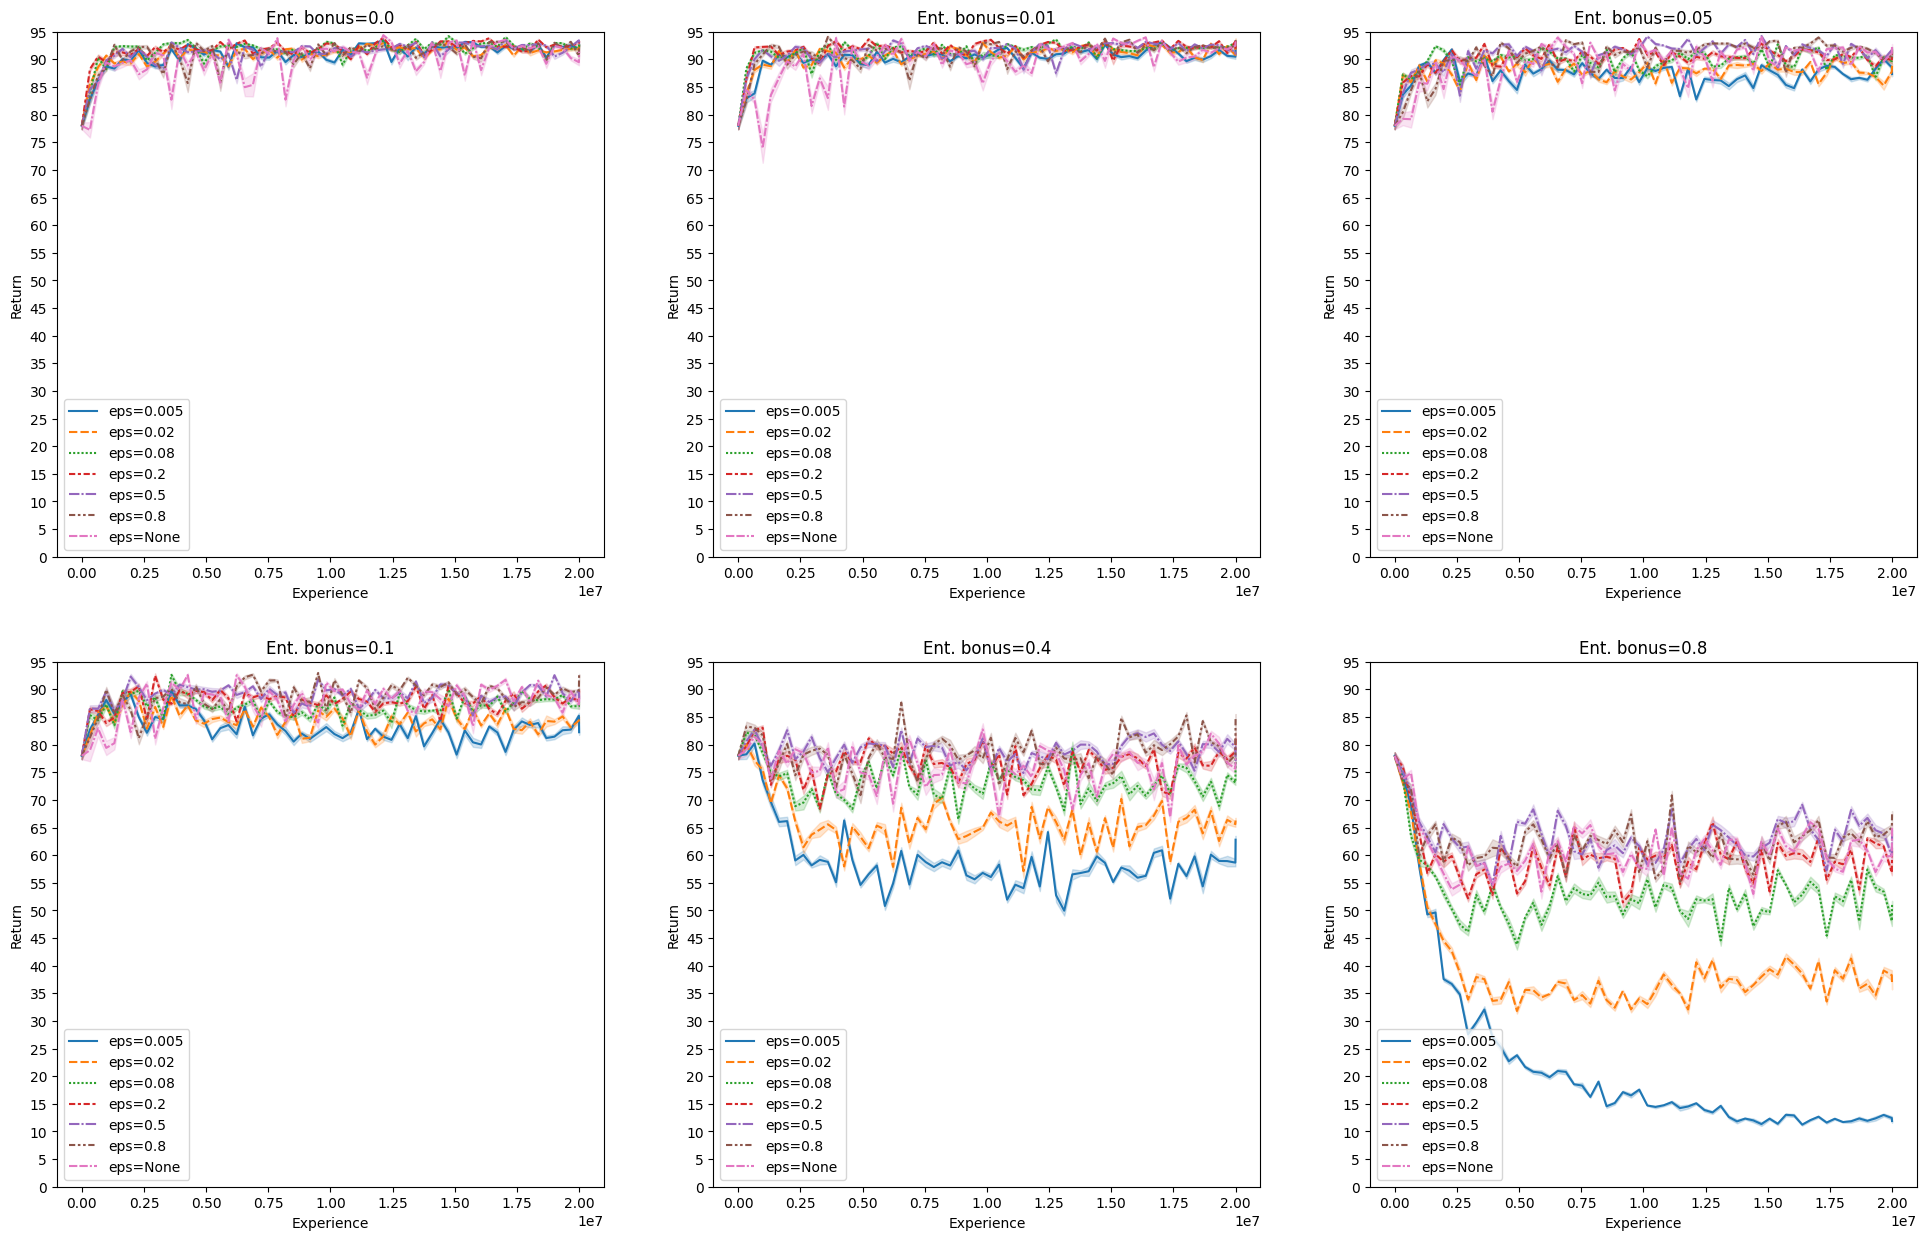

Heatmap


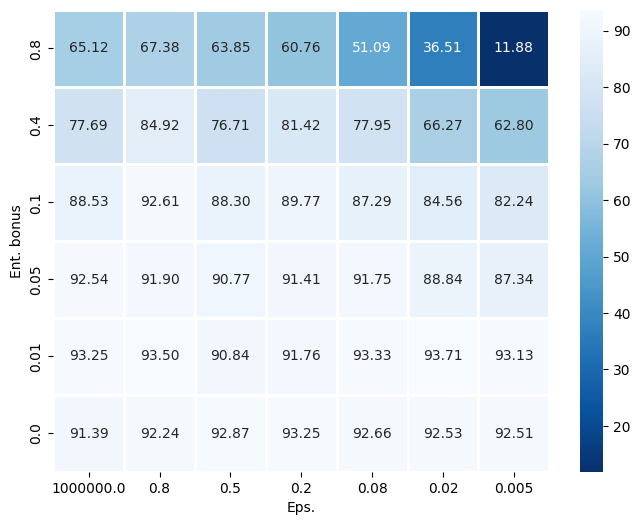

In [20]:
returns = plot_returns("Breakout-MinAtar", ents, clips, base="optimal", y_min=0, y_max=95, tick=5)

## 4. CartPole

In [21]:
# returns = plot_returns("CartPole-v1", ents, clips, base="noreg", y_max=505)

Shape: (8, 6, 7, 31)
Max: 500.0


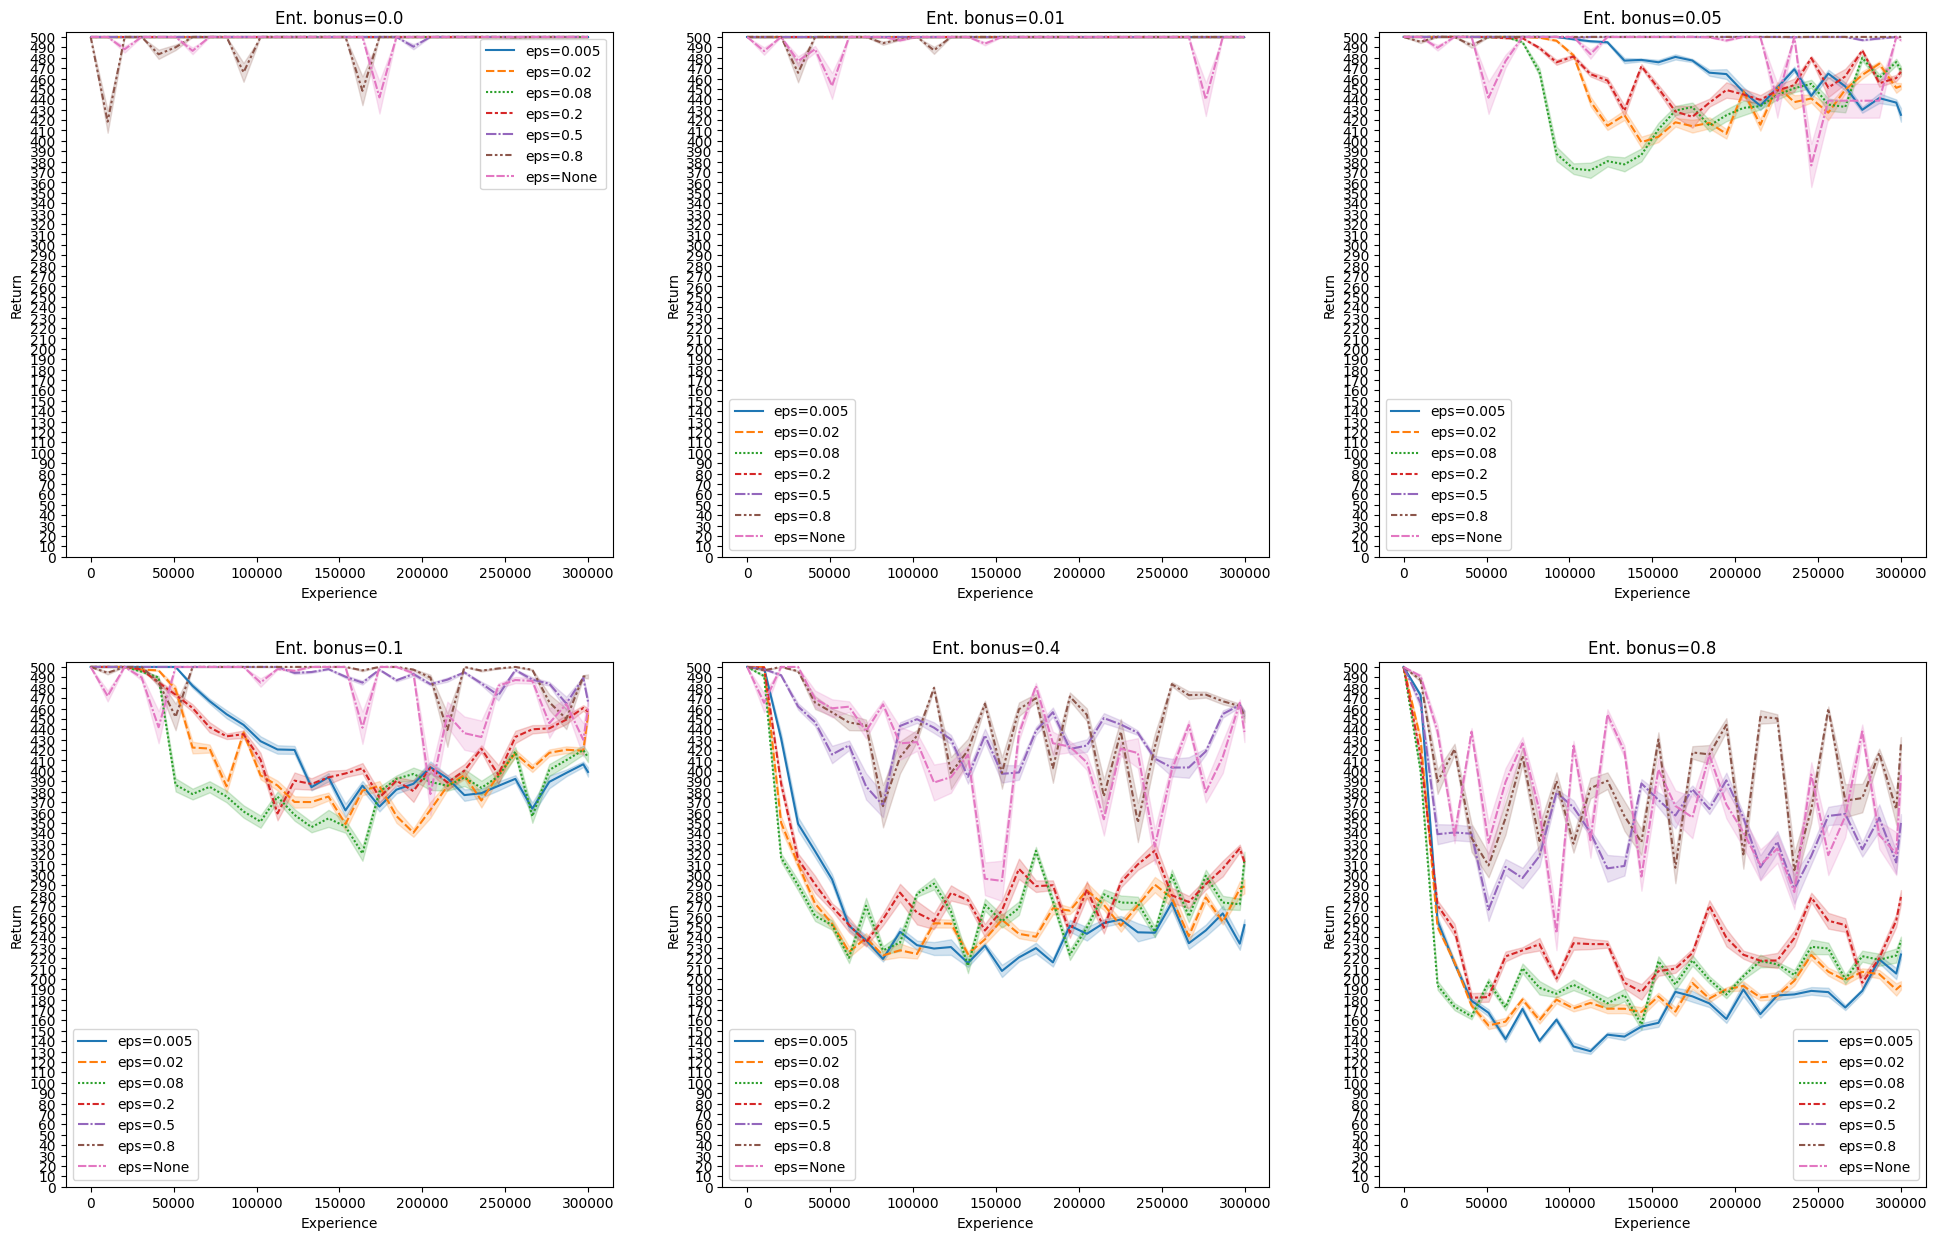

Heatmap


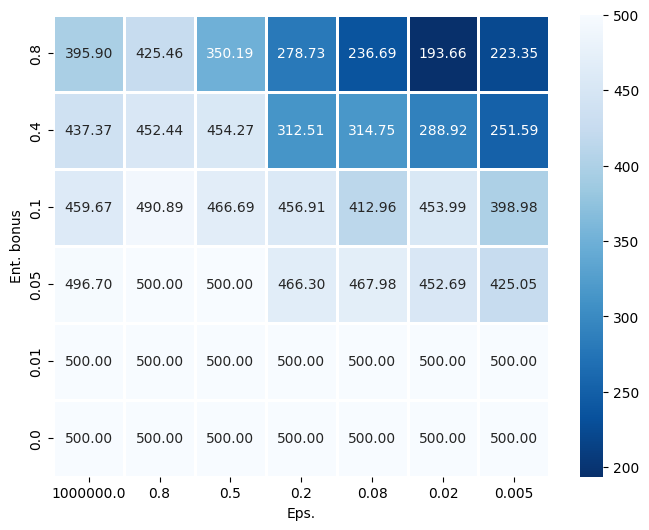

In [22]:
returns = plot_returns("CartPole-v1", ents, clips, base="optimal", y_min=0, y_max=505)

## 5. Freeway

In [23]:
# returns = plot_returns("Freeway-MinAtar", ents, clips, base="noreg", y_max=65, tick=5)

Shape: (8, 6, 7, 63)
Max: 63.242188


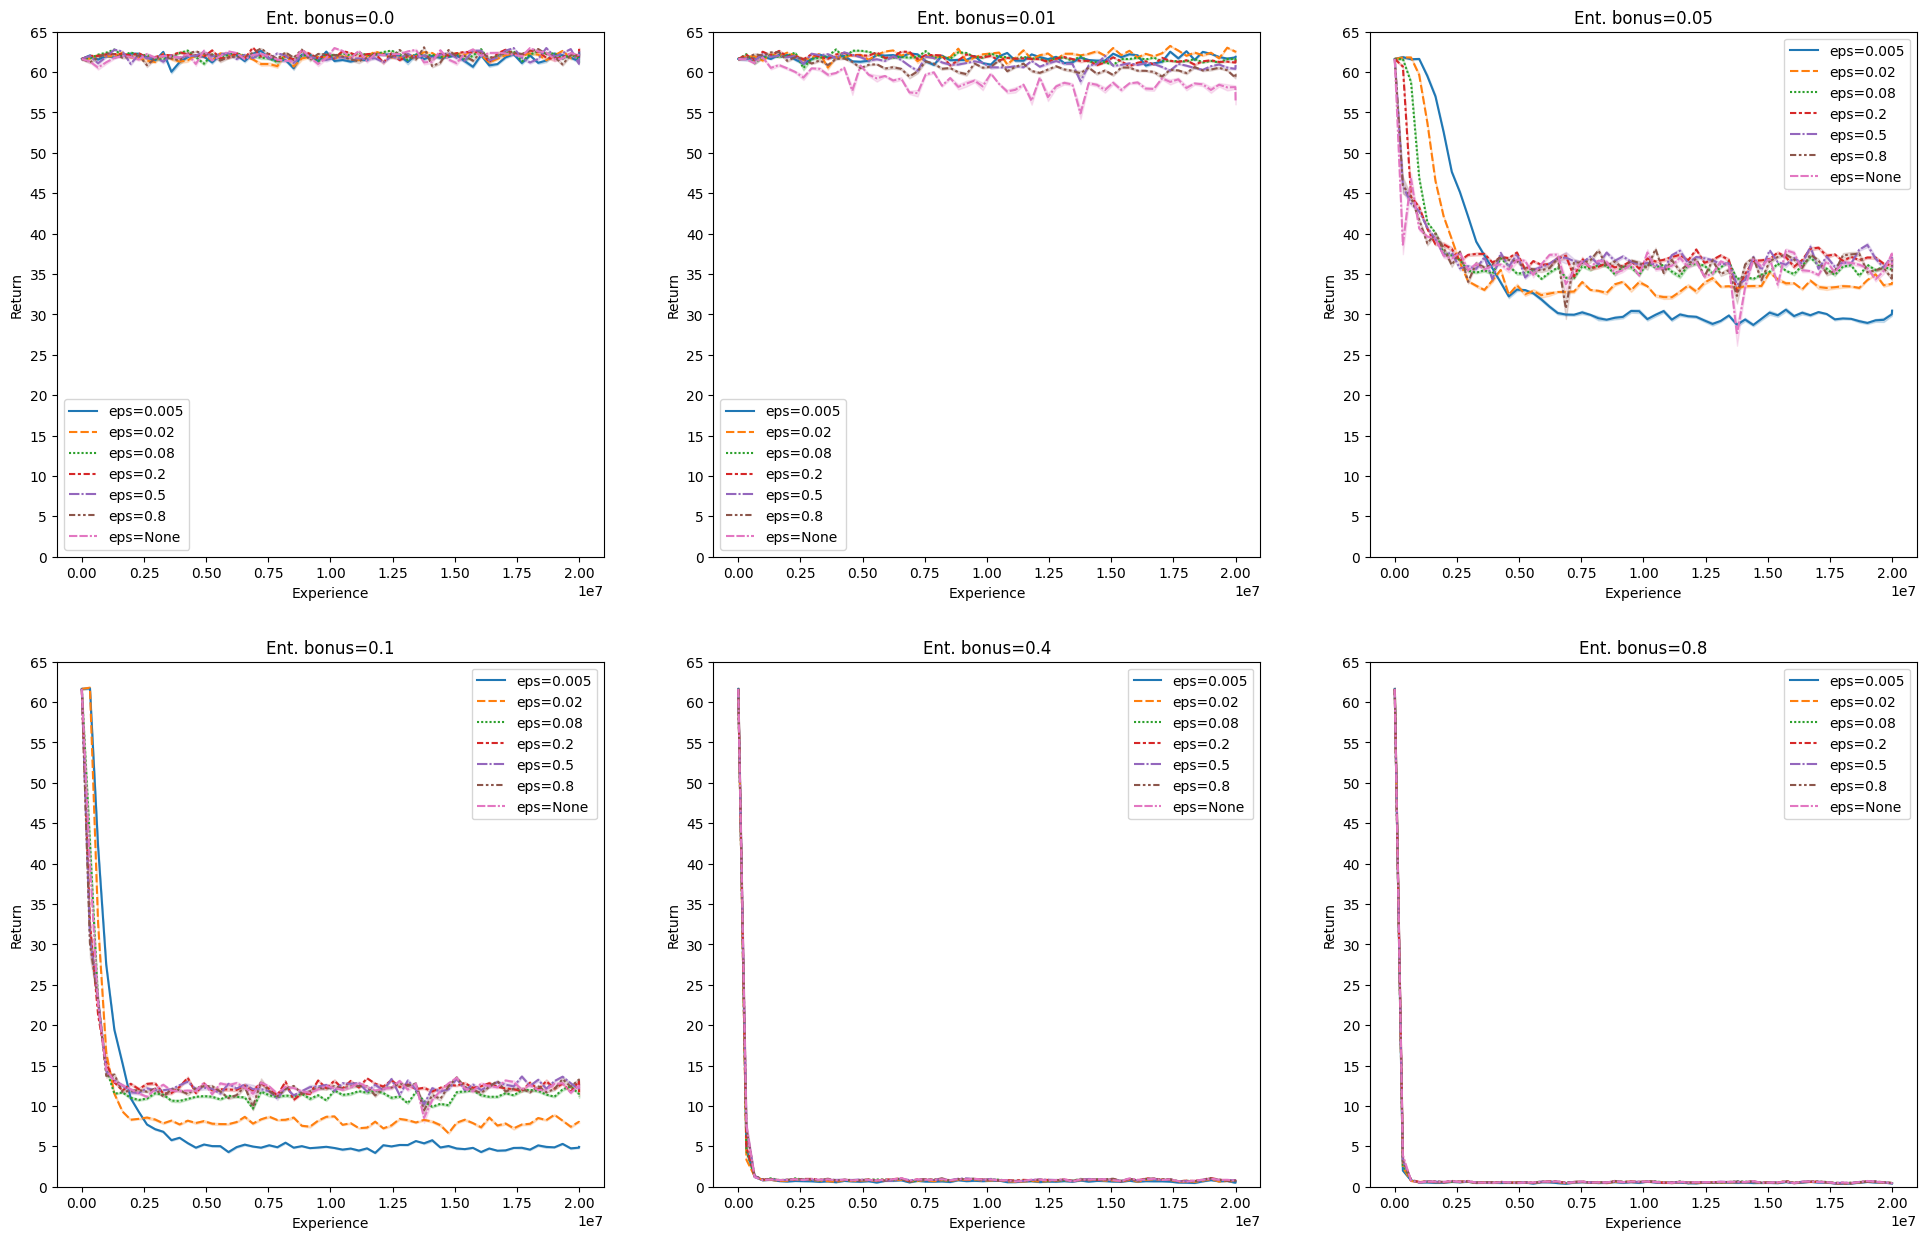

Heatmap


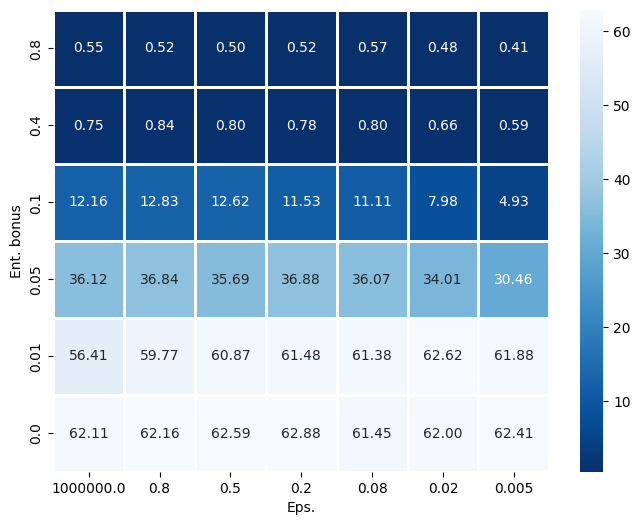

In [24]:
returns = plot_returns("Freeway-MinAtar", ents, clips, base="optimal", y_min=0, y_max=65, tick=5)

## 6. MountainCar

In [25]:
# returns = plot_returns("MountainCar-v0", ents, clips, base="noreg", y_max=-99)

Shape: (8, 6, 7, 26)
Max: -97.859375


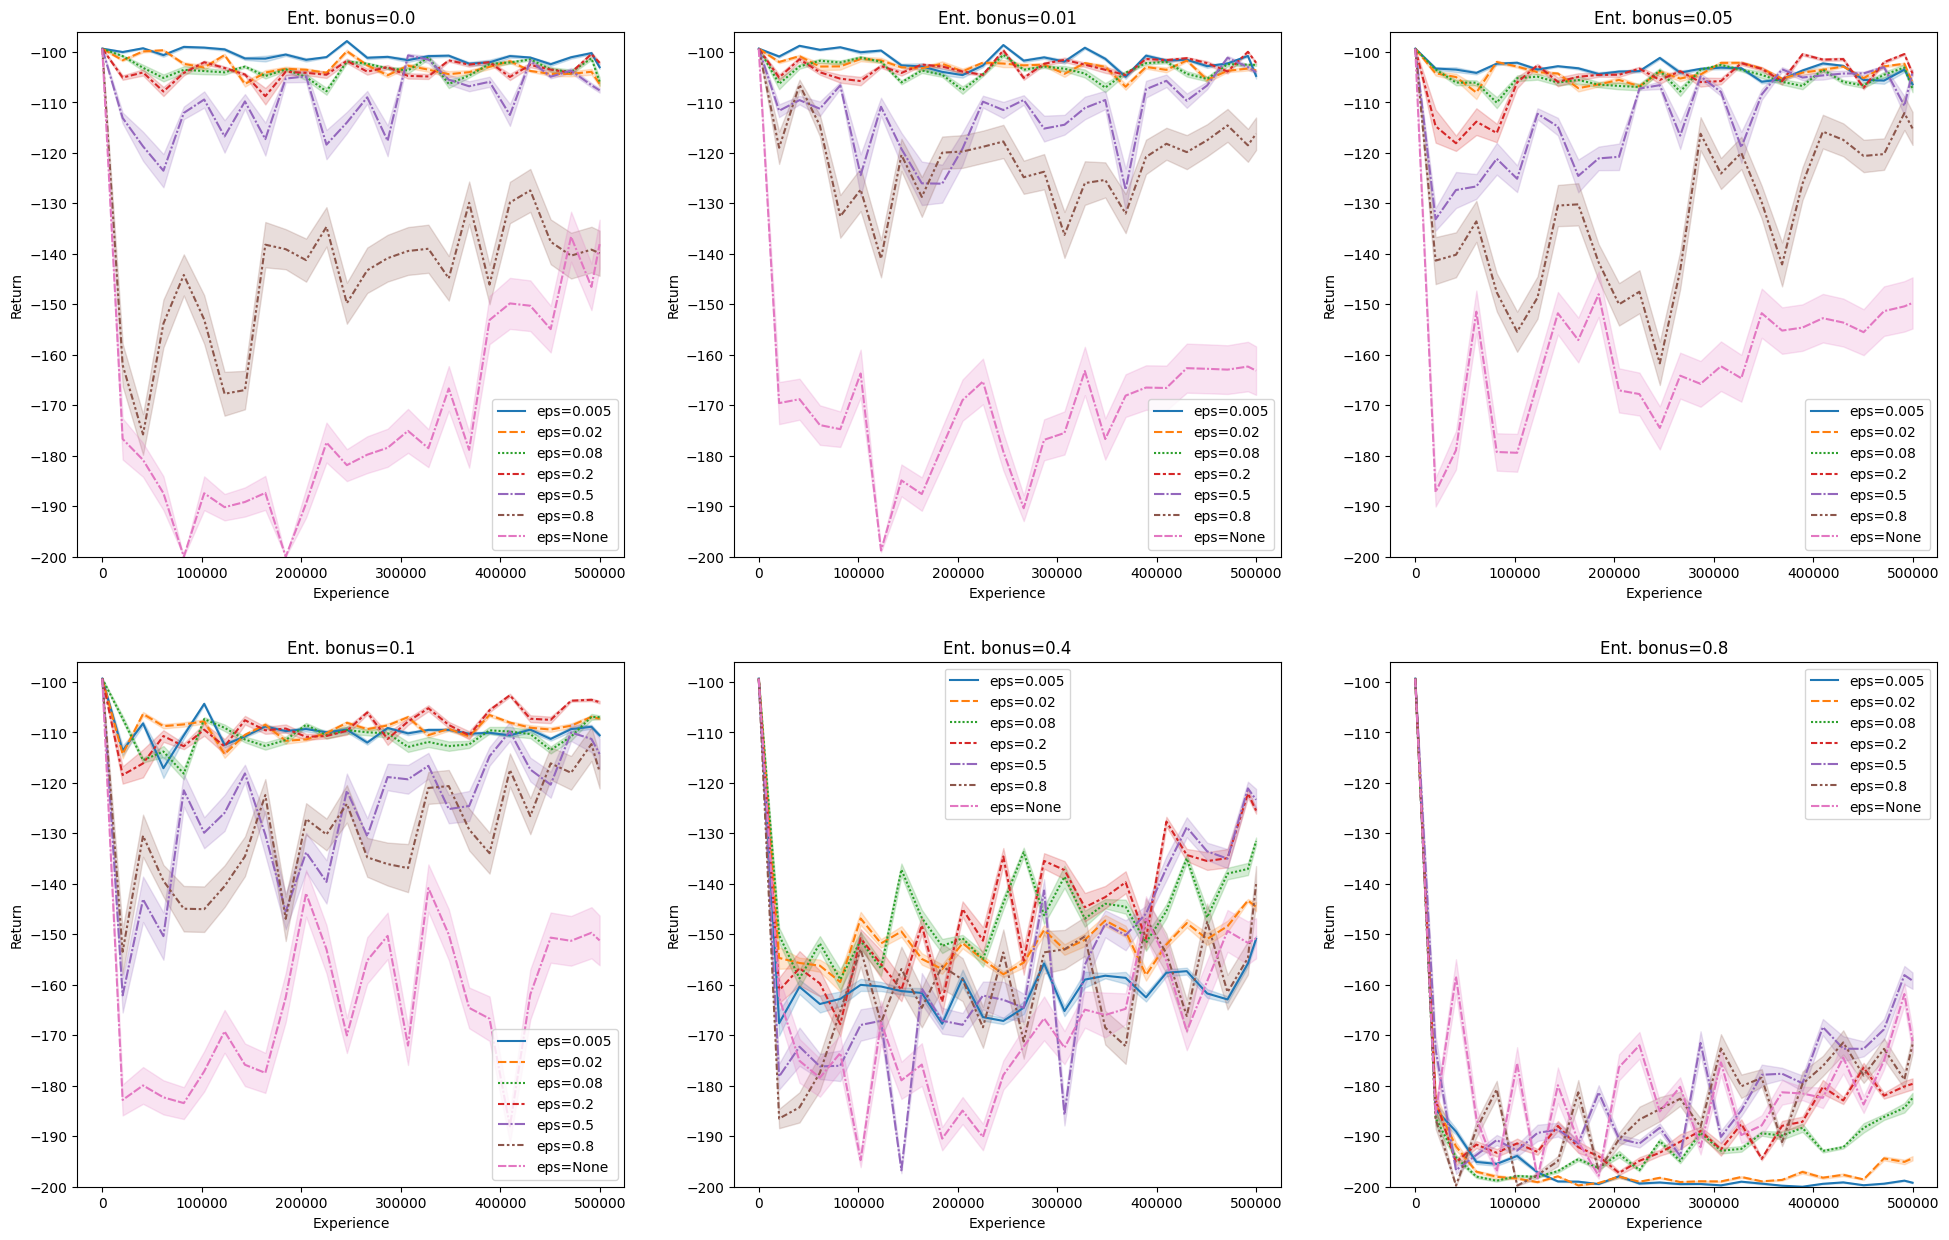

Heatmap


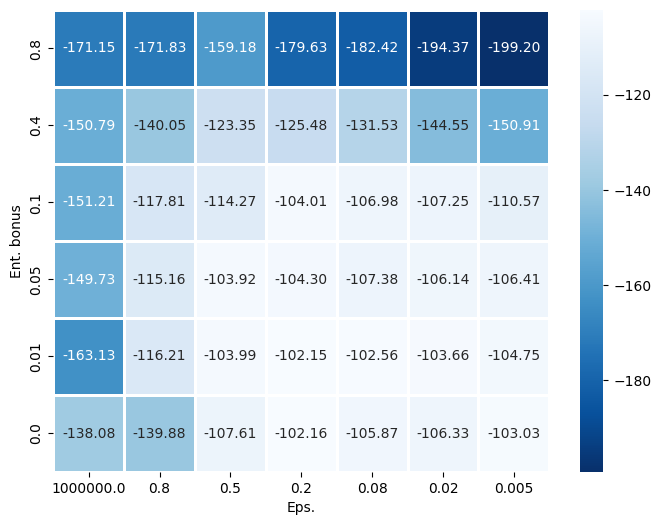

In [26]:
returns = plot_returns("MountainCar-v0", ents, clips, base="optimal", y_min=-200, y_max=-96)

## 7. SpaceInvaders

In [27]:
# returns = plot_returns("SpaceInvaders-MinAtar", ents, clips, base="noreg", y_max=171)

Shape: (8, 6, 7, 63)
Max: 180.82812


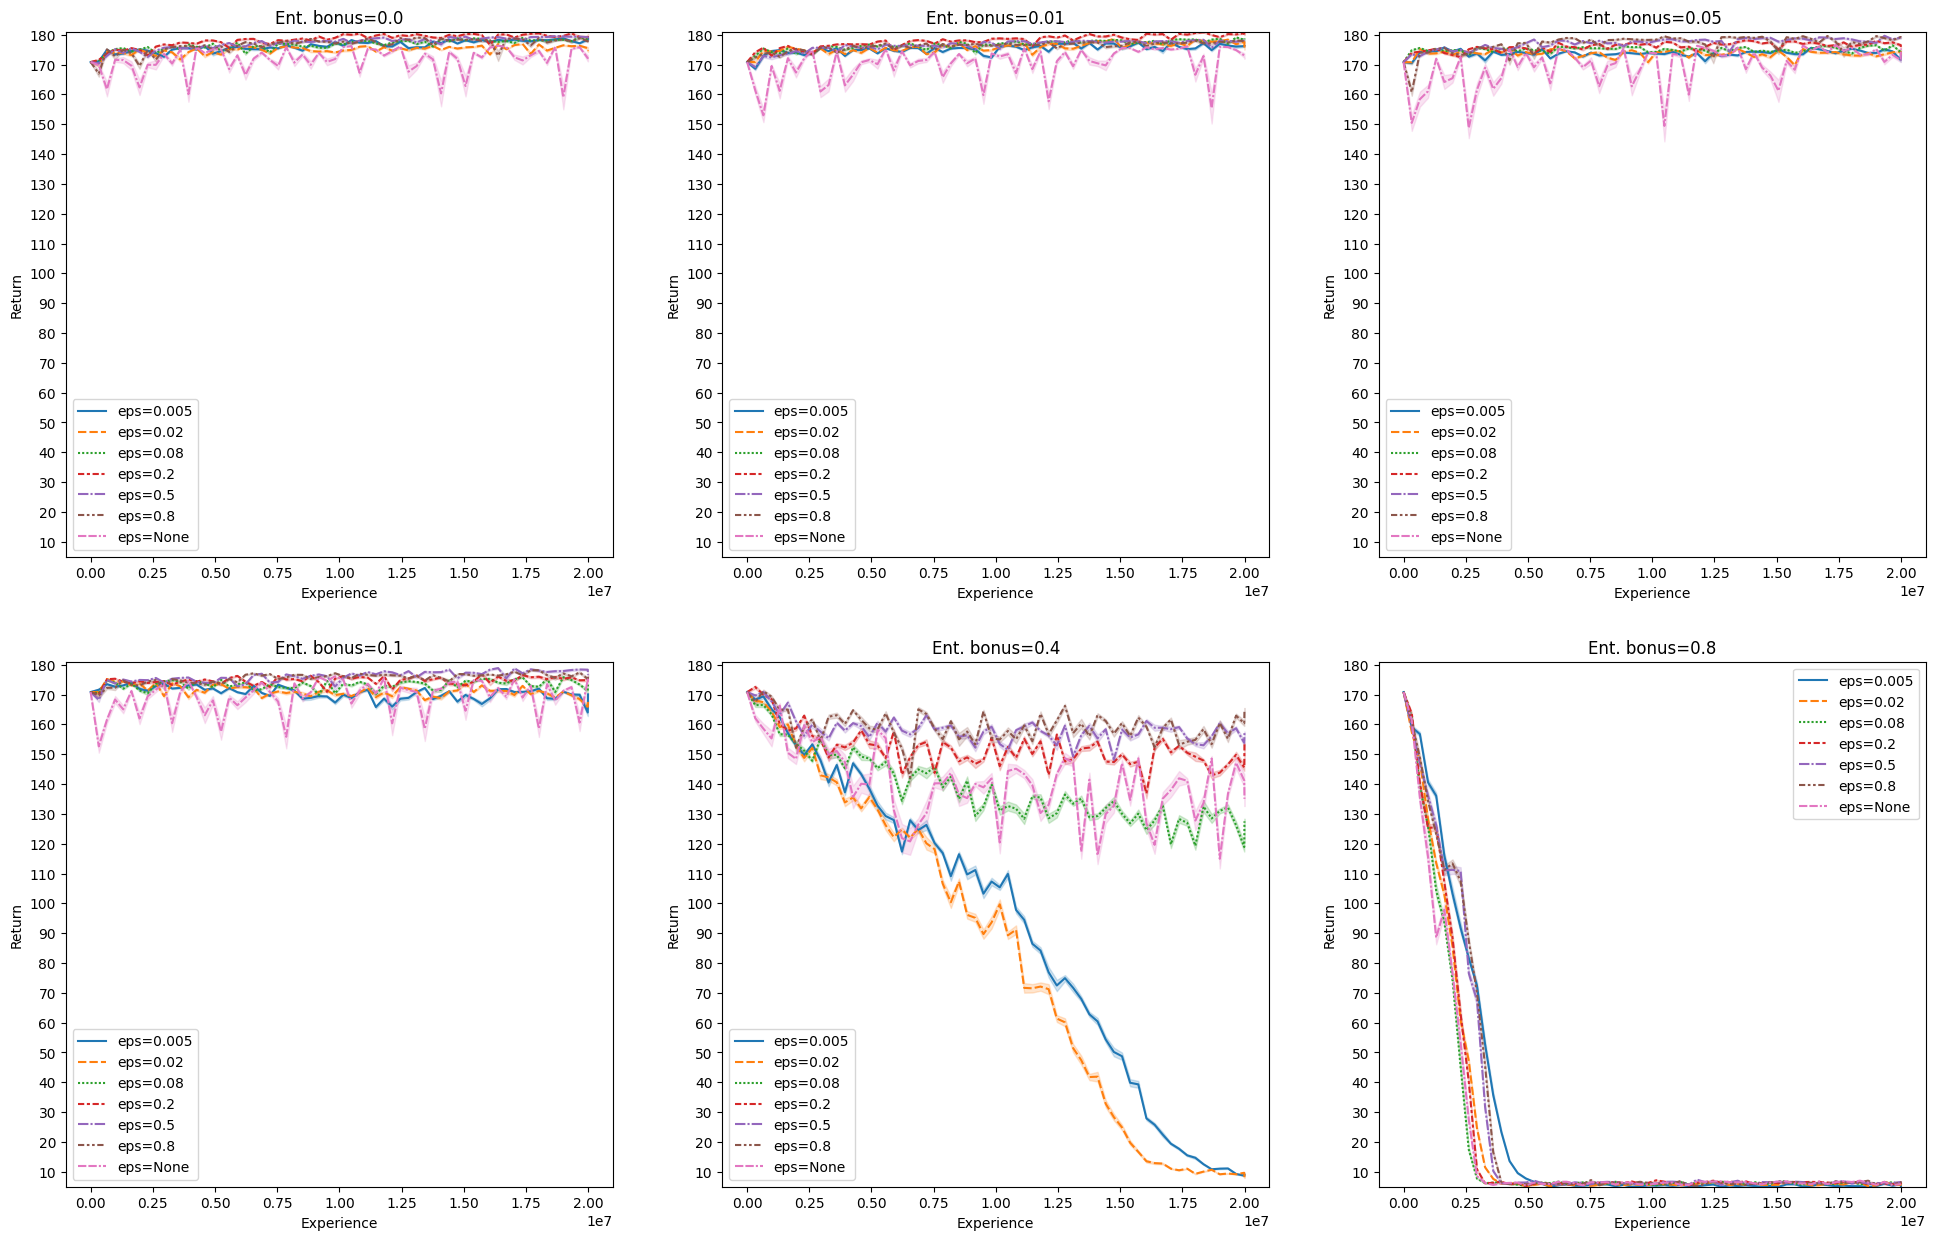

Heatmap


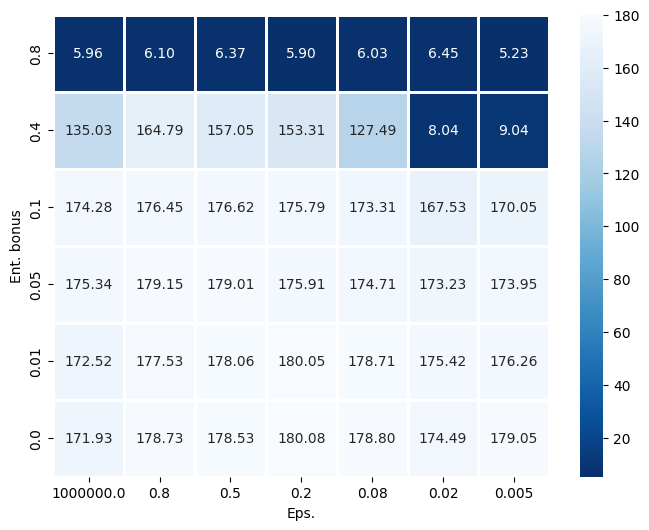

In [28]:
returns = plot_returns("SpaceInvaders-MinAtar", ents, clips, base="optimal", y_min=5, y_max=181)